In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('train.csv')

In [159]:
from sklearn.model_selection import train_test_split
x = df.drop('price_range', axis=1) 
y = df['price_range'] 


In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [166]:
from sklearn.preprocessing import MinMaxScaler 
x_train = MinMaxScaler().fit_transform(x_train) 
x_test = MinMaxScaler().fit_transform(x_test)

In [167]:
from sklearn.neural_network import MLPClassifier
nn_migraine = MLPClassifier(hidden_layer_sizes=(30,15), max_iter=850, alpha=0.01, activation='tanh', 
learning_rate_init=0.05, solver='adam')
nn_migraine.fit(x_train, y_train)


MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(30, 15),
              learning_rate_init=0.05, max_iter=850)

In [168]:
y_pred = nn_migraine.predict(x_test)

In [169]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred), 5)
round(accuracy_score(y_test, y_pred) * 100, 5)

91.0

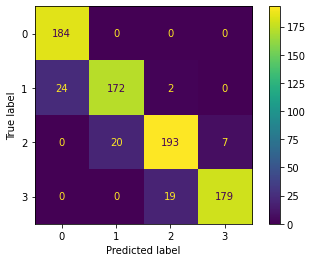

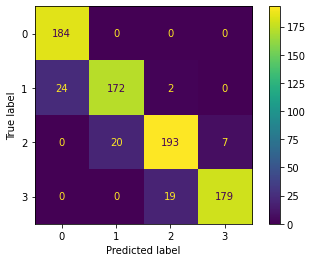

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       184
           1       0.90      0.87      0.88       198
           2       0.90      0.88      0.89       220
           3       0.96      0.90      0.93       198

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_estimator(nn_migraine, x_test, y_test).plot()
plt.show()
print(classification_report(y_test, y_pred))

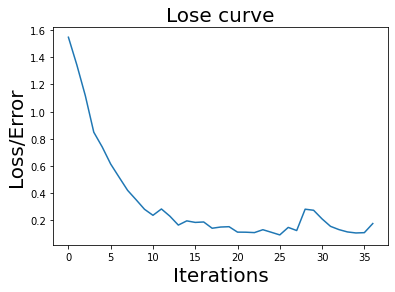

In [171]:
import matplotlib.pyplot as plt
plt.plot(nn_migraine.loss_curve_)
plt.title('Lose curve', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Loss/Error', fontsize=20)
plt.show()